# Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train_b = pd.read_csv('train_b.csv')


# Observación inicial

In [3]:
df_train_b.head()


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,79740,0,0.146563,57y,0,443.000000,NaN,3,0,0,0,0.0
1,30558,0,0.054405,36y,0,2266.000000,NaN,5,0,1,0,NaN
2,1410,0,0.103319,84y,0,0.278180,4000.0,12,0,0,0,0.0
3,57097,1,0.147705,25y,2,0.098451,2000.0,2,3,0,0,1.0
4,2766,1,0.995003,30y,1,0.176956,4000.0,3,10,0,0,0.0


In [4]:
df_train_b.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   SeriousDlqin2yrs                      73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58750 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [5]:
# Los títulos de las columnas son ilegibles, así que empezamos por simplificarlos
# Echamos un vistazo al kaggle para ver qué hace cada una: https://www.kaggle.com/code/caesarlupum/modeling-give-me-some-credit/notebook
df_train_b = df_train_b.rename(columns={'Id': 'Person (ID)',
                                        'SeriousDlqin2yrs': '+89 delinquency days in 2 years',
                                        'RevolvingUtilizationOfUnsecuredLines': '% of revolving credit available used',
                                        'age': 'Age (years)',
                                        'NumberOfTime30-59DaysPastDueNotWorse': '30-59 delinquency days in 2 years',
                                        'DebtRatio': 'Debt ratio',
                                        'MonthlyIncome': 'Monthly income',
                                        'NumberOfOpenCreditLinesAndLoans': 'Credit lines & loans',
                                        'NumberOfTimes90DaysLate': '90 days payment delays',
                                        'NumberRealEstateLoansOrLines': 'Real estate loans or lines',
                                        'NumberOfTime60-89DaysPastDueNotWorse': '60-89 delinquency days in 2 years',
                                        'NumberOfDependents': 'Dependents'
                                        }
                                )


In [6]:
df_train_b.head()


,Person (ID),+89 delinquency days in 2 years,% of revolving credit available used,Age (years),30-59 delinquency days in 2 years,Debt ratio,Monthly income,Credit lines & loans,90 days payment delays,Real estate loans or lines,60-89 delinquency days in 2 years,Dependents
0,79740,0,0.146563,57y,0,443.000000,NaN,3,0,0,0,0.0
1,30558,0,0.054405,36y,0,2266.000000,NaN,5,0,1,0,NaN
2,1410,0,0.103319,84y,0,0.278180,4000.0,12,0,0,0,0.0
3,57097,1,0.147705,25y,2,0.098451,2000.0,2,3,0,0,1.0
4,2766,1,0.995003,30y,1,0.176956,4000.0,3,10,0,0,0.0


# Limpieza

## Columna 0: Person (ID)

In [7]:
# No nos interesa convertir esta a dummies, así que la ignoramos
# Nos será útil si luego hay que localizar alguno en concreto
df_train_b['Person (ID)'].unique()


array([ 79740,  30558,   1410, ..., 142820,  43368,  53806], dtype=int64)

## Columna 1: +89 delinquency days in 2 years

In [8]:
# Numérica y sin nulos, no necesita cambios
df_train_b['+89 delinquency days in 2 years'].unique()


array([0, 1], dtype=int64)

## Columna 2: % of revolving credit available used

In [9]:
df_train_b['% of revolving credit available used'].unique()


array([0.14656337, 0.05440539, 0.10331853, ..., 0.05761835, 0.00896637,
       0.12349612])

In [10]:
# Para esta multiplicamos todos los valores por 100, de manera que obtenemos el porcentaje del crédito rotativo utilizado respecto del límite total
df_train_b['% of revolving credit available used'] = df_train_b['% of revolving credit available used'] * 100


In [11]:
df_train_b['% of revolving credit available used'].unique()


array([14.6563373,  5.4405392, 10.3318532, ...,  5.7618348,  0.8966368,
       12.3496118])

## Columna 3: Age (years)

In [12]:
df_train_b['Age (years)'].unique()


array(['57y', '36y', '84y', '25y', '30y', '35y', '72y', '56y', '59y',
       '71y', '38y', '39y', '23y', '34y', '44y', '61y', '54y', '49y',
       '53y', '46y', '76y', '65y', '42y', '69y', '37y', '64y', '62y',
       '48y', '89y', '41y', '52y', '67y', '51y', '77y', '50y', '68y',
       '66y', '55y', '27y', '45y', '63y', '43y', '47y', '40y', '28y',
       '73y', '33y', '79y', '70y', '74y', '24y', '32y', '29y', '80y',
       '82y', '78y', '87y', '58y', '26y', '75y', '60y', '81y', '31y',
       '85y', '83y', '22y', '95y', '86y', '99y', '91y', '94y', '88y',
       '21y', '93y', '90y', '97y', '92y', '103y', '96y', '109y', '0y',
       '98y', '101y', '102y', '105y'], dtype=object)

In [13]:
# Con tal de convertirla en numérica, basta con liquidar la y
df_train_b['Age (years)'] = df_train_b['Age (years)'].apply(lambda x: x[:-1])

df_train_b['Age (years)'] = pd.to_numeric(df_train_b['Age (years)'])


In [14]:
df_train_b['Age (years)'].unique()


array([ 57,  36,  84,  25,  30,  35,  72,  56,  59,  71,  38,  39,  23,
        34,  44,  61,  54,  49,  53,  46,  76,  65,  42,  69,  37,  64,
        62,  48,  89,  41,  52,  67,  51,  77,  50,  68,  66,  55,  27,
        45,  63,  43,  47,  40,  28,  73,  33,  79,  70,  74,  24,  32,
        29,  80,  82,  78,  87,  58,  26,  75,  60,  81,  31,  85,  83,
        22,  95,  86,  99,  91,  94,  88,  21,  93,  90,  97,  92, 103,
        96, 109,   0,  98, 101, 102, 105], dtype=int64)

## Columna 4: 30-59 delinquency days in 2 years

In [15]:
# Numérica y sin nulos, con lo que se deja igual
df_train_b['30-59 delinquency days in 2 years'].unique()


array([ 0,  2,  1,  6,  3,  5,  4,  7, 98, 10,  9, 13,  8, 96, 12],
      dtype=int64)

## Columna 5: Debt ratio

In [16]:
# Ya es numérica y sin nulos; no necesita retoques
df_train_b['% of revolving credit available used'].unique()


array([14.6563373,  5.4405392, 10.3318532, ...,  5.7618348,  0.8966368,
       12.3496118])

## Columna 6: Monthly income

In [17]:
df_train_b['Monthly income'].unique()


array([   nan,  4000.,  2000., ...,  9434.,  5554., 17967.])

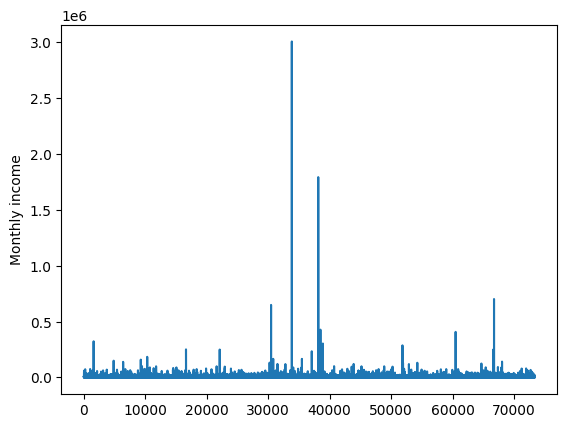

In [18]:
# Esta tiene algunos nulos. La representamos gráficamente
sns.lineplot(df_train_b['Monthly income'])
plt.show()


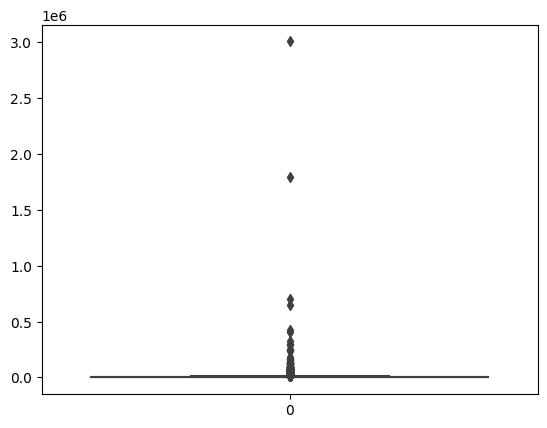

In [19]:
# Vemos que hay unos pocos valores muy por encima del resto, y un par que se elevan enormemente por encima de los demás
# Lo confirmamos con un boxplot
sns.boxplot(df_train_b['Monthly income'])
plt.show()


In [20]:
# Como lo más probable es que los nulos correspondan a ese grandísima mayoría de números que no se elevan, y se trata de una variable contínua, los imputamos a la media de ese conjunto
Q1 = df_train_b['Monthly income'].quantile(0.25)
Q3 = df_train_b['Monthly income'].quantile(0.75)
IQR = Q1 - Q3
maximum = Q1 - 1.5*IQR

precise_mean = df_train_b[df_train_b['Monthly income'] < maximum]['Monthly income'].mean()

df_train_b['Monthly income'] = df_train_b['Monthly income'].fillna(precise_mean)


In [21]:
df_train_b['Monthly income'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 73363 entries, 0 to 73362
Series name: Monthly income
Non-Null Count  Dtype  
--------------  -----  
73363 non-null  float64
dtypes: float64(1)
memory usage: 573.3 KB


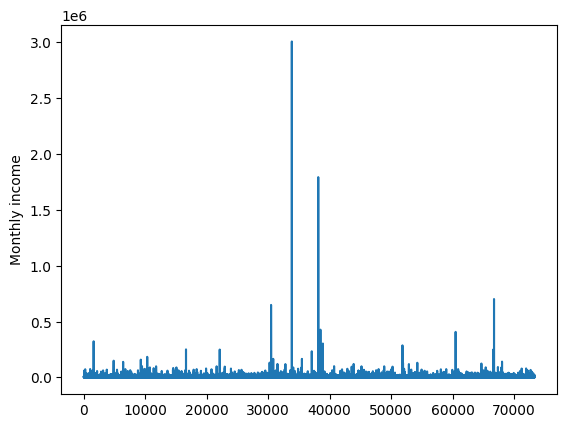

In [22]:
# Hemos imputado los nulos y la línea general de la gráfica lineplot se mantiene
sns.lineplot(df_train_b['Monthly income'])
plt.show()


## Columna 7: Credit lines & loans

In [23]:
# Ya es numérica y sin nulos; no necesita retoques
df_train_b['Credit lines & loans'].unique()


array([ 3,  5, 12,  2, 10,  4,  7,  6, 15, 20, 13, 16, 11, 23,  8,  1,  9,
       22, 19, 14,  0, 17, 25, 18, 21, 26, 31, 29, 24, 27, 28, 30, 33, 35,
       34, 39, 36, 32, 54, 43, 44, 42, 38, 52, 48, 40, 37, 41, 58, 50, 51,
       49, 45, 46], dtype=int64)

## Columna 8: 90 days payment delays

In [24]:
# Como la anterior, no requiere cambios
df_train_b['90 days payment delays'].unique()


array([ 0,  3, 10,  1,  2,  5,  7, 98,  4,  6, 12,  8, 14,  9, 11, 15, 96,
       13, 17], dtype=int64)

## Columna 9: Real estate loans or lines

In [25]:
# Sin cambios
df_train_b['Real estate loans or lines'].unique()


array([ 0,  1,  2,  3,  4,  5,  9,  7, 10,  6,  8, 16, 11, 13, 15, 12, 25,
       23, 54, 17, 19, 14, 20, 21], dtype=int64)

## Columna 10: 60-89 delinquency days in 2 years

In [26]:
# No necesita cambios, pues carece de nulos y sus valores son numéricos
df_train_b['60-89 delinquency days in 2 years'].unique()


array([ 0,  1,  2,  3, 98,  4,  5,  6,  7, 96, 11], dtype=int64)

## Columna 11: Dependents

In [27]:
# Tiene nulos
df_train_b['Dependents'].unique()


array([ 0., nan,  1.,  2.,  4.,  5.,  3.,  6.,  8.,  7.,  9., 10.])

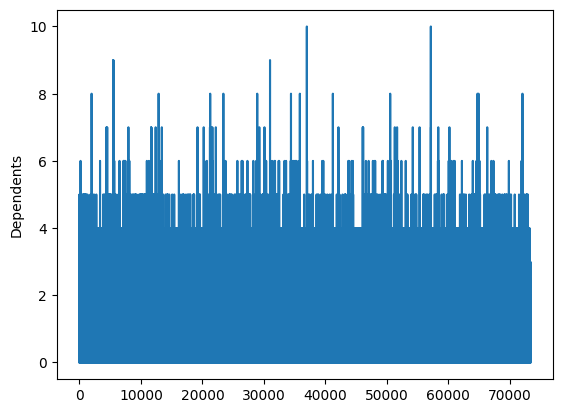

In [28]:
# La representamos gráficamente. Al parecer, los valores son bastante estables
sns.lineplot(df_train_b['Dependents'])
plt.show()


In [29]:
# La gráfica engaña un poco, pues en realidad hay muchos que están cerca del 0 o son 0
print(df_train_b['Dependents'].mean())
print(df_train_b['Dependents'].median())


0.752424535035056
0.0


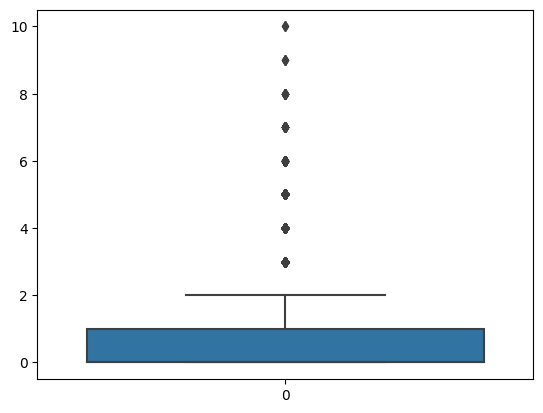

In [30]:
# Lo comprobamos con un boxplot
sns.boxplot(df_train_b['Dependents'])
plt.show()


In [31]:
# Para el caso, lo más conveniente parece ser imputar los nulos a la mediana (0). Las razones son las siguientes:
# Primero, se trata de una variable discreta, con lo que la media queda descartada
# Segundo, la mediana es un indicativo razonable cuando los valores son dispares
# Tercero, según Kaggle, la fuente es Credit Fusion, lo que significa que los datos provienen seguramente de los propios bancos
# Tales instituciones suelen ofrecer ventajas a los que están al cargo de personas dependientes. Por tanto, existe un incentivo para los que tienen una o más para entregar sus datos
# Deducimos que las personas que no se han esforzado en entregar sus datos probablemente no se hayan visto incentivadas a hacerlo por no tener personas dependientes
df_train_b['Dependents'] = df_train_b['Dependents'].fillna(0)

df_train_b['Dependents'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 73363 entries, 0 to 73362
Series name: Dependents
Non-Null Count  Dtype  
--------------  -----  
73363 non-null  float64
dtypes: float64(1)
memory usage: 573.3 KB


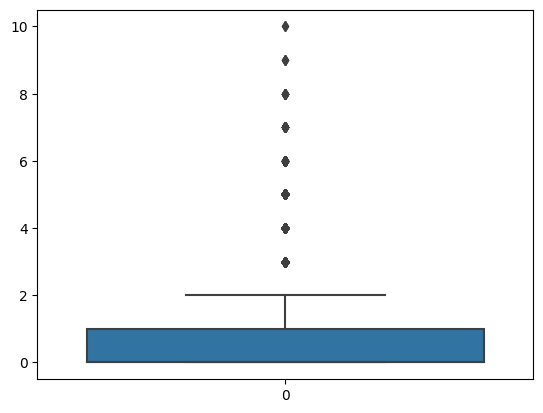

In [32]:
# El boxplot resultante tiene un aspecto similar
sns.boxplot(df_train_b['Dependents'])
plt.show()


In [33]:
# Finalmente, convertimos la columna a integer para optimizar la memoria, ya que sus valores no tienen decimales
df_train_b['Dependents'] = df_train_b['Dependents'].apply(lambda x: int(x))


# Observación final

In [34]:
df_train_b.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Person (ID)                           73363 non-null  int64  
 1   +89 delinquency days in 2 years       73363 non-null  int64  
 2   % of revolving credit available used  73363 non-null  float64
 3   Age (years)                           73363 non-null  int64  
 4   30-59 delinquency days in 2 years     73363 non-null  int64  
 5   Debt ratio                            73363 non-null  float64
 6   Monthly income                        73363 non-null  float64
 7   Credit lines & loans                  73363 non-null  int64  
 8   90 days payment delays                73363 non-null  int64  
 9   Real estate loans or lines            73363 non-null  int64  
 10  60-89 delinquency days in 2 years     73363 non-null  int64  
 11  Dependents     

In [35]:
df_train_b.head()


,Person (ID),+89 delinquency days in 2 years,% of revolving credit available used,Age (years),30-59 delinquency days in 2 years,Debt ratio,Monthly income,Credit lines & loans,90 days payment delays,Real estate loans or lines,60-89 delinquency days in 2 years,Dependents
0,79740,0,14.656337,57,0,443.000000,5095.533263,3,0,0,0,0
1,30558,0,5.440539,36,0,2266.000000,5095.533263,5,0,1,0,0
2,1410,0,10.331853,84,0,0.278180,4000.000000,12,0,0,0,0
3,57097,1,14.770459,25,2,0.098451,2000.000000,2,3,0,0,1
4,2766,1,99.500278,30,1,0.176956,4000.000000,3,10,0,0,0


In [36]:
df_train_b.to_csv('df_train_b_cleaned.csv', index=False)
